## Use this to generate a big table of within cell mean/std/cv

Starting with manually created cell database. For each file specifying file, start, stop, sex, condition, region, etc. etc.

Uses the output of reanalyze.py

In [51]:
%load_ext autoreload
%autoreload 2

import os, sys

import numpy as np
import pandas as pd
import scipy
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display#, set_matplotlib_formats

sys.path.insert(0,'../sanpy')
import bAnalysisUtil

# maps human readable name to backend stat
# like 
# statName = statNameMap['Spike Frequency (Hz)'][yStat] # return 'spikeFreq_hz'
statNameMap = bAnalysisUtil.statList
for tmpStat in statNameMap.keys():
    print(tmpStat)

sns.set_context('talk')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Spike Frequency (Hz)
Cycle Length (ms)
Take Off Potential (mV)
AP Peak (mV)
AP Height (mV)
Pre AP Min (mV)
Post AP Min (mV)
Early Diastolic Depol Rate (dV/s)
Early Diastolic Duration (ms)
Diastolic Duration (ms)
Max AP Upstroke (mV)
Max AP Upstroke (dV/dt)
Max AP Repolarization (mV)
AP Duration (ms)
Half Width 20 (ms)
Half Width 50 (ms)
Half Width 80 (ms)
Ca++ Delay (s)
Ca++ Width (ms)


## Load .csv (output of reanalyze.py)

In [142]:
path = '/Users/cudmore/data/laura-ephys/Superior vs Inferior database_master.csv'
#path = '/Users/cudmore/data/laura-ephys/Superior_Inferior_database_master_jan25.csv'
df = pd.read_csv(path, header=0) #, dtype={'ABF File': str})
#display(df.head())

## For this specific dataset, remove recordings with very few spikes

In [143]:
removeByAnalysisName = '2020_07_16_0004_s1_77_s8_48'
df = df[ df['analysisname'] != removeByAnalysisName]

## Within cell mean of any stat

In [144]:
humanStatStr = 'Spike Frequency (Hz)'
humanStatStr = 'Take Off Potential (mV)'

# convert human to actual column name
statStr = statNameMap[humanStatStr]['yStat']

print(statStr)
statDf = df.groupby(['Region', 'Sex', 'Condition', 'analysisname'])[statStr].describe();
statDf = statDf.reset_index()
display(statDf)


thresholdVal


,Region,Sex,Condition,analysisname,count,mean,std,min,25%,50%,75%,max
0,Inferior,Female,ctrl,2020_07_07_0000_s38_09_s48_81,11.0,-39.584073,1.513528,-42.297363,-40.222168,-39.520264,-38.452148,-37.658691
1,Inferior,Female,ctrl,2020_07_07_0004_s16_21_s197_59,134.0,-19.396882,0.526883,-19.989014,-19.775391,-19.515991,-19.195557,-16.845703
2,Inferior,Female,ctrl,2020_07_20_0004_s0_00_s357_73,63.0,-19.785563,0.208210,-19.989014,-19.927979,-19.866943,-19.699097,-18.951416
3,Inferior,Male,ctrl,2020_06_30_0000_s42_26_s65_75,44.0,-39.954446,0.033472,-39.978027,-39.978027,-39.978027,-39.947510,-39.886475
4,Inferior,Male,ctrl,2020_07_23_0002_s1_19_s67_42,37.0,-19.829003,0.196649,-19.989014,-19.989014,-19.897461,-19.775391,-19.256592
5,Inferior,Male,ctrl,2020_07_23_0003_s7_73_s103_03,92.0,-17.853115,1.184039,-19.897461,-18.829346,-17.791748,-16.929626,-15.594482
6,Superior,Female,ctrl,2020_06_25_0001_s98_16_s108_62,70.0,-86.005075,1.024532,-88.531494,-86.669922,-86.074829,-85.388184,-83.892822
7,Superior,Female,ctrl,2020_06_30_0002_s108_23_s196_89,300.0,-19.039408,0.765067,-19.989014,-19.683838,-19.165039,-18.699646,-15.716553
8,Superior,Female,ctrl,2020_07_07_0001_s709_72_s789_47,44.0,-19.863475,0.093592,-19.989014,-19.927979,-19.882202,-19.775391,-19.622803
9,Superior,Female,ctrl,2020_07_30_0002_s2_78_s20_25,83.0,-16.911518,1.728100,-19.805908,-18.386841,-16.815186,-15.472412,-13.488770


## Descriptive statistis for one stat column
n<=20
- paired, use Wilcoxon Signed Rank Test
- unpaired, use t-test

n>20
- paired, use Wilcoxon Signed Rank Test
- unpaired, use Mann Whitney U

In [145]:
humanStatStr = 'Diastolic Duration (ms)'
humanStatStr = 'Max AP Upstroke (dV/dt)'
humanStatStr = 'Spike Frequency (Hz)'
humanStatStr = 'Take Off Potential (mV)'
humanStatStr = 'Pre AP Min (mV)' # MDP
humanStatStr = 'AP Duration (ms)'
humanStatStr = 'Early Diastolic Duration (ms)'
humanStatStr = 'Early Diastolic Depol Rate (dV/s)'
humanStatStr = 'Diastolic Duration (ms)'
humanStatStr = 'AP Peak (mV)'
humanStatStr = 'AP Height (mV)'
humanStatStr = 'Max AP Upstroke (dV/dt)'
humanStatStr = 'Half Width 50 (ms)'


# convert human to actual column name
stat = statNameMap[humanStatStr]['yStat']

groupByList = ['Region', 'Sex', 'Condition', 'analysisname']
aggList = ['count', 'mean', 'std', 'sem', 'min', 'max']

dfStat = df.groupby(groupByList)[stat].agg(aggList);
dfStat = dfStat.reset_index()
#dfStat.insert(loc=0, column='statName', value=stat)
dfStat.insert(loc=0, column='humanStat', value=humanStatStr)

# get descriptive stats between superior and inferior
dfStatRegion = dfStat.groupby('Region')['mean'].agg(aggList)
#dfStatRegion.insert(loc=0, column='statName', value=stat)
dfStatRegion.insert(loc=0, column='humanStat', value=humanStatStr)

# grab superior/inferior and run stats
dfSup = dfStat[ dfStat['Region']=='Superior']['mean']
dfInf = dfStat[ dfStat['Region']=='Inferior']['mean']

# t-test
statistic, p = scipy.stats.ttest_ind(dfSup, dfInf, nan_policy='omit')
print(f'{stat}, nSup:{len(dfSup)}, nInf:{len(dfInf)}, t-test t-statistic:{statistic}, p={p}')

display(dfStatRegion)
display(dfStat)


widths_50, nSup:10, nInf:6, t-test t-statistic:0.38637047765330934, p=0.7050308254331399


,humanStat,count,mean,std,sem,min,max
Region,,,,,,,
Inferior,Half Width 50 (ms),6,67.211292,31.999461,13.063725,27.490000,106.320455
Superior,Half Width 50 (ms),10,92.154847,154.088959,48.727207,24.374016,528.797727


,humanStat,Region,Sex,Condition,analysisname,count,mean,std,sem,min,max
0,Half Width 50 (ms),Inferior,Female,ctrl,2020_07_07_0000_s38_09_s48_81,10,27.490000,2.953886,0.934101,24.0,33.7
1,Half Width 50 (ms),Inferior,Female,ctrl,2020_07_07_0004_s16_21_s197_59,133,90.611278,38.803957,3.364730,24.3,214.3
2,Half Width 50 (ms),Inferior,Female,ctrl,2020_07_20_0004_s0_00_s357_73,61,61.722951,14.724530,1.885283,45.6,139.0
3,Half Width 50 (ms),Inferior,Male,ctrl,2020_06_30_0000_s42_26_s65_75,44,106.320455,72.283407,10.897134,28.5,440.7
4,Half Width 50 (ms),Inferior,Male,ctrl,2020_07_23_0002_s1_19_s67_42,36,83.911111,23.675337,3.945890,56.6,174.8
5,Half Width 50 (ms),Inferior,Male,ctrl,2020_07_23_0003_s7_73_s103_03,92,33.211957,1.775464,0.185105,28.3,37.8
6,Half Width 50 (ms),Superior,Female,ctrl,2020_06_25_0001_s98_16_s108_62,70,33.441429,0.456354,0.054545,32.3,34.8
7,Half Width 50 (ms),Superior,Female,ctrl,2020_06_30_0002_s108_23_s196_89,299,56.090970,5.855711,0.338644,43.3,79.6
8,Half Width 50 (ms),Superior,Female,ctrl,2020_07_07_0001_s709_72_s789_47,44,528.797727,25.796723,3.889002,485.0,595.1
9,Half Width 50 (ms),Superior,Female,ctrl,2020_07_30_0002_s2_78_s20_25,83,38.491566,1.279024,0.140391,34.9,42.2


## Main table with within cell mean/std/cv

Copy/paste this into graphing software like Prism for easy plotting

This table can also be used for k-means-clustering. See myKMeans.ipynb

In [166]:
#for x in statNameMap:
#    print(x)

# all stats
statList = [statNameMap[x]['yStat'] for x in statNameMap]

# one stat
#humanStatStr = 'Spike Frequency (Hz)'
#statList = [statNameMap[humanStatStr]['yStat']]
#statList = ['isi_ms']
#statList = ['spikeFreq_hz']

groupByList = ['Region', 'Sex', 'Condition', 'analysisname']
aggList = ['mean', 'std', 'sem', 'min', 'max', 'cv']
#doCvList = ['spikeFreq_hz']
doCvList = ['isi_ms']

# make initial table with final number of rows
# make an 'n' column
dfFinal = df.groupby(groupByList)['spikeFreq_hz'].agg('count');
dfFinal = dfFinal.reset_index()
dfFinal = dfFinal.rename(columns={'spikeFreq_hz': 'n'})

for stat in statList:
    if not stat in df.columns:
        print('skipping stat column:', stat)
        continue
    for agg in aggList:
        if agg == 'cv':
            if stat in doCvList:
                # cv is using isi_ms (std/mean)
                stdNp = dfFinal[stat+'_std'].to_numpy()
                meanNp = dfFinal[stat+'_mean'].to_numpy()
                dfFinal[stat+'_cv'] = np.divide(stdNp, meanNp)
        else:
            statDf = df.groupby(groupByList)[stat].agg(agg);
            statDf = statDf.reset_index()
            dfFinal[stat+'_'+agg] = statDf[stat]
#
dfFinal = dfFinal.reset_index()
display(dfFinal)

# save
print('saving: apTable.csv')
dfFinal.to_csv('apTable.csv')



skipping stat column: caDelay_sec
skipping stat column: caWidth_ms


,index,Region,Sex,Condition,analysisname,n,spikeFreq_hz_mean,spikeFreq_hz_std,spikeFreq_hz_sem,spikeFreq_hz_min,...,widths_50_mean,widths_50_std,widths_50_sem,widths_50_min,widths_50_max,widths_80_mean,widths_80_std,widths_80_sem,widths_80_min,widths_80_max
0,0,Inferior,Female,ctrl,2020_07_07_0000_s38_09_s48_81,9,1.683259,0.935194,0.311731,0.479731,...,27.490000,2.953886,0.934101,24.0,33.7,9.020000,1.619190,0.512033,7.6,13.0
1,1,Inferior,Female,ctrl,2020_07_07_0004_s16_21_s197_59,132,1.440363,1.820570,0.158460,0.138902,...,90.611278,38.803957,3.364730,24.3,214.3,21.690977,9.787604,0.848693,9.8,71.2
2,2,Inferior,Female,ctrl,2020_07_20_0004_s0_00_s357_73,60,1.359467,1.523765,0.196717,0.023378,...,61.722951,14.724530,1.885283,45.6,139.0,34.768852,6.872106,0.879883,23.1,65.3
3,3,Inferior,Male,ctrl,2020_06_30_0000_s42_26_s65_75,44,2.522046,1.024555,0.154458,0.116867,...,106.320455,72.283407,10.897134,28.5,440.7,61.293182,35.163819,5.301145,12.3,132.5
4,4,Inferior,Male,ctrl,2020_07_23_0002_s1_19_s67_42,35,1.344800,0.993525,0.167936,0.097373,...,83.911111,23.675337,3.945890,56.6,174.8,44.725000,13.885581,2.314263,29.3,96.3
5,5,Inferior,Male,ctrl,2020_07_23_0003_s7_73_s103_03,92,1.983403,1.535256,0.160061,0.133608,...,33.211957,1.775464,0.185105,28.3,37.8,12.967391,1.170809,0.122065,9.8,15.4
6,6,Superior,Female,ctrl,2020_06_25_0001_s98_16_s108_62,70,6.689916,0.354222,0.042338,6.119951,...,33.441429,0.456354,0.054545,32.3,34.8,17.128571,0.313994,0.037529,16.4,17.8
7,7,Superior,Female,ctrl,2020_06_30_0002_s108_23_s196_89,299,3.600745,0.575429,0.033278,0.963484,...,56.090970,5.855711,0.338644,43.3,79.6,28.273244,2.926336,0.169234,23.3,47.5
8,8,Superior,Female,ctrl,2020_07_07_0001_s709_72_s789_47,44,0.552423,0.046975,0.007082,0.400914,...,528.797727,25.796723,3.889002,485.0,595.1,407.240909,20.679541,3.117558,377.0,470.0
9,9,Superior,Female,ctrl,2020_07_30_0002_s2_78_s20_25,83,4.749091,0.257863,0.028304,4.106776,...,38.491566,1.279024,0.140391,34.9,42.2,18.227711,0.753741,0.082734,16.5,20.0


saving: apTable.csv


Diastolic Duration (ms), nSup:10, nInf:6, t-test t-statistic:-2.7798502540258645, p=0.014753728307839338
saving diastolicDuration_ms_mean.pdf


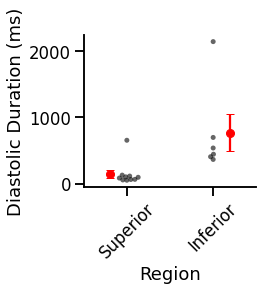

In [173]:
# plot cv sup/inf
humanStatStr = 'Diastolic Duration (ms)'

myStat = statNameMap[humanStatStr]['yStat']
myStat += '_mean'

dfSup = dfFinal[ dfFinal['Region'] == 'Superior'][myStat]
dfInf = dfFinal[ dfFinal['Region'] == 'Inferior'][myStat]

statistic, p = scipy.stats.ttest_ind(dfSup, dfInf, nan_policy='omit')
print(f'{humanStatStr}, nSup:{len(dfSup)}, nInf:{len(dfInf)}, t-test t-statistic:{statistic}, p={p}')

#xSup = [0 for x in cvSup]
#xInf = [1 for x in cvInf]

fig, axs = plt.subplots(1,1,figsize=(4,4))

#markersize = 4
#axs.plot(xSup, cvSup, 'ok', alpha=0.5, markersize=markersize)
#axs.plot(xInf, cvInf, 'ok', alpha=0.5, markersize=markersize)
sns.swarmplot(x="Region", y=myStat, hue=None,
              data=dfFinal, 
              color='k',
              dodge=True, alpha=.6, zorder=1,
             order=["Superior", "Inferior"],
             ax=axs)

ySupMean = dfSup.mean()
yInfMean = dfInf.mean()

ySupSem = dfSup.sem()
yInfSem = dfInf.sem()

markersize = 8
axs.errorbar(-0.2, ySupMean, yerr=ySupSem, 
             fmt='or', capsize=4, zorder=1, markersize=markersize)
axs.errorbar(+1.2, yInfMean, yerr=yInfSem, 
             fmt='or', capsize=4, zorder=1, markersize=markersize)

#plt.xticks([0,1], ['Superior', 'Inferior'], rotation=45, fontsize=14)
axs.tick_params(axis='x', rotation=45)

axs.set_xlim(-.5, 1.5)

yLim = axs.get_ylim()
yLimRange = abs(yLim[1]-yLim[0])
yScale = 0.1
yLimNew = [yLim[0]-yLimRange*yScale, yLim[1]+yLimRange*yScale]
#axs.set_ylim(-.1, 2.1)
axs.set_ylabel(humanStatStr)

sns.despine()

fig.tight_layout()

saveFile = myStat + '.pdf'
print('saving', saveFile)
plt.savefig(saveFile, dpi=600)


In [8]:
dfFinal = None
for stat in statList:
    for agg in aggList:
        statDf = df.groupby(['Region', 'Sex', 'Condition', 'analysisname'])[stat].agg(agg);
        statDf = statDf.rename(columns={stat: agg})
        if dfFinal is None:
            dfFinal = statDf
        else:
            dfFinal = dfFinal.append(statDf)
            dfFinal[stat+'_'+agg] = statDf
dfFinal = dfFinal.reset_index()
display(dfFinal)

#statDf['spikeFreq_Hz']

TypeError: rename() got an unexpected keyword argument 'columns'

/Users/cudmore/Sites/SanPy/sanpy_env/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 28.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cudmore/Sites/SanPy/sanpy_env/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 77.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Region', ylabel='earlyDiastolicDurationRate'>

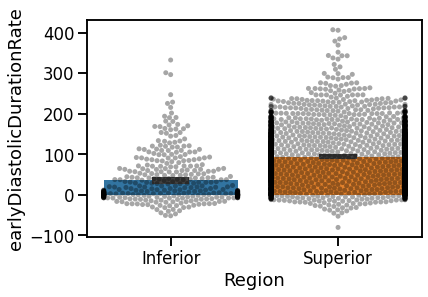

In [9]:

#sns.catplot(data=df, x='Region', y=statStr, hue='Region')

# I want to get the mean per cell and then plot

ax = sns.barplot(x="Region", y=statStr, data=df, ci=68, capsize=0.2)

sns.swarmplot(x="Region", y=statStr, data=df, color="0", alpha=.35)
#sns.stripplot(x="Region", y=statStr, data=df, color="0", alpha=.35)


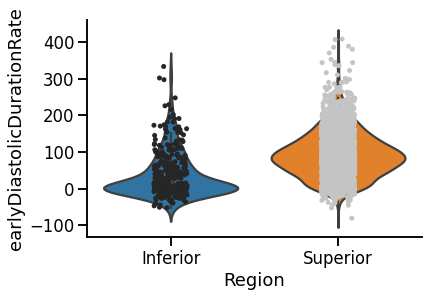

In [10]:
#sns.boxplot(x="Region", y=statStr, kind="box", data=df)

fig, ax = plt.subplots()

g = sns.violinplot(x="Region", y=statStr,
                hue="Region",
                data=df,
                dodge=False,
                ax=ax)
g = sns.stripplot(x="Region", y=statStr,
                hue="Region",
                data=df,
                color = "0.77",
                dodge=False,
                ax=ax)
sns.despine(ax=ax)
#ax.set_ylabel("survival probability")
l = ax.legend()
#l.set_title('Whatever you want')
l.remove()

,earlyDiastolicDurationRate_mean,earlyDiastolicDurationRate_std,earlyDiastolicDurationRate_sem,earlyDiastolicDurationRate_count,Region
0,61.338861,45.327553,2.356467,370,Superior
1,97.379945,28.179685,3.368117,70,Superior
2,114.453165,70.458018,3.385996,433,Superior
3,164.751036,48.062149,2.893001,276,Superior
4,13.048662,6.431966,0.969655,44,Superior
5,1.330102,2.995925,1.339818,5,Superior
6,81.396431,27.141713,2.087824,169,Superior
7,94.875243,29.554241,1.614721,335,Superior
8,64.678121,39.655817,4.352791,83,Superior
9,86.595569,65.237287,1.929624,1143,Superior


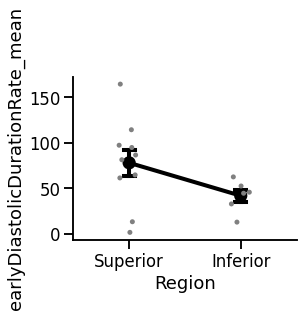

In [11]:
supDf = df [ df['Region']=='Superior' ]
newDf = supDf.groupby('filename', as_index=False)[statStr].agg(['mean', 'std', 'sem', 'count']) #.mean()
newDf['Region'] = 'Superior'
newDf.columns = [c if c=='Region' else statStr+'_'+c for c in newDf.columns.to_list()]

infDf = df [ df['Region']=='Inferior' ]
newDf2 = infDf.groupby('filename', as_index=False)[statStr].agg(['mean', 'std', 'sem', 'count']) #mean()
newDf2['Region'] = 'Inferior'
newDf2.columns = [c if c=='Region' else statStr+'_'+c for c in newDf2.columns.to_list()]

newDf = newDf.append(newDf2, ignore_index=True)

display(newDf)

fig, ax = plt.subplots(figsize=(4,3))

mStatStr = statStr + '_mean'

sns.stripplot(x='Region', y=mStatStr, data=newDf, color="0.5", ax=ax);
sns.pointplot(x='Region', y=mStatStr, data=newDf, ci=68, capsize=0.1, color='k', ax=ax)
sns.despine()


4.623507741947217 93.9236665481998


/Users/cudmore/Sites/SanPy/sanpy_env/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


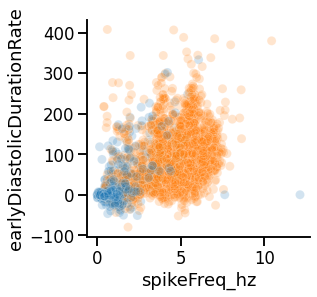

In [12]:
xStat = 'spikeFreq_hz'
yStat = 'earlyDiastolicDurationRate'

fig, ax = plt.subplots(figsize=(4,4))

sns.scatterplot(x=xStat, y=yStat, hue='Region', alpha=0.2, data=df, ax=ax)
#sns.pointplot(x='spikeFreq_hz', y='earlyDiastolicDurationRate', hue='Region', ci=68, data=df)
sns.despine()

supDf = df [ df['Region']=='Superior' ]
infDf = df [ df['Region']=='Inferior' ]

xList = supDf[xStat].tolist()
xMean = np.nanmean(xList)
xSem = scipy.stats.sem(xList)

yList = supDf[yStat].tolist()
yMean = np.nanmean(yList)
ySem = scipy.stats.sem(yList)

print(xMean, yMean)

ax.errorbar(x=xMean, y=yMean, xerr=xSem, yerr=ySem)

ax.legend().remove()

plt.show()

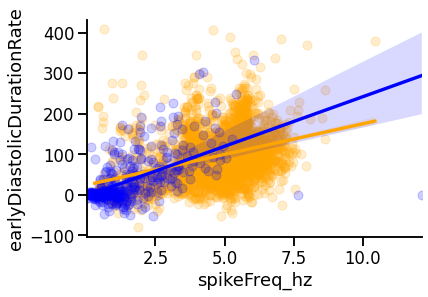

In [13]:
supDf = df [ df['Region']=='Superior' ]
infDf = df [ df['Region']=='Inferior' ]

sns.regplot(x='spikeFreq_hz', y='earlyDiastolicDurationRate', color='orange', data=supDf, scatter_kws={'alpha':0.2})
sns.regplot(x='spikeFreq_hz', y='earlyDiastolicDurationRate', color='blue', data=infDf, scatter_kws={'alpha':0.2})
sns.despine()

In [14]:
df.groupby('filename', as_index=False)['spikeFreq_hz','isi_ms', 'condition1'].mean()

/Users/cudmore/Sites/SanPy/sanpy_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,filename,spikeFreq_hz,isi_ms
0,2020_06_23_0006,4.606427,238.976216
1,2020_06_25_0001,6.689916,149.885714
2,2020_06_30_0000,2.522046,674.154545
3,2020_06_30_0002,3.354747,352.277136
4,2020_07_01_0002,5.607393,178.846014
5,2020_07_07_0000,1.683259,848.600000
6,2020_07_07_0001,0.552423,1823.959091
7,2020_07_07_0004,1.440363,1297.651515
8,2020_07_16_0004,0.733093,1429.280000
9,2020_07_20_0004,1.359467,5461.683333
